# 【問題1】データセットの取得
<br>
pd.read_csv()を使用して、変数に格納

In [1]:
import pandas as pd
df = pd.read_csv('/Users/suzukiyuuta/Downloads/train.csv')
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# 【問題2】データセット自体の調査

trainデータに含まれるデータを元に住宅販売価格を予測するモデルを作成しTESTデータでIDごとの販売価格を計算し提出する。
予測モデルについてはさまざま手法を検証することで各モデルの特徴運用またはヴィジュアルなデータ分析の練習を行う。

# 【問題3】データの確認

各特徴量がどういったものかを見る。（数値データか文字データなど）

In [2]:
print(type(df))
df_columns = list(df.columns)
for i in df_columns:
    print(i + str(type(df.at[0,i])))

<class 'pandas.core.frame.DataFrame'>
Id<class 'numpy.int64'>
MSSubClass<class 'numpy.int64'>
MSZoning<class 'str'>
LotFrontage<class 'numpy.float64'>
LotArea<class 'numpy.int64'>
Street<class 'str'>
Alley<class 'float'>
LotShape<class 'str'>
LandContour<class 'str'>
Utilities<class 'str'>
LotConfig<class 'str'>
LandSlope<class 'str'>
Neighborhood<class 'str'>
Condition1<class 'str'>
Condition2<class 'str'>
BldgType<class 'str'>
HouseStyle<class 'str'>
OverallQual<class 'numpy.int64'>
OverallCond<class 'numpy.int64'>
YearBuilt<class 'numpy.int64'>
YearRemodAdd<class 'numpy.int64'>
RoofStyle<class 'str'>
RoofMatl<class 'str'>
Exterior1st<class 'str'>
Exterior2nd<class 'str'>
MasVnrType<class 'str'>
MasVnrArea<class 'numpy.float64'>
ExterQual<class 'str'>
ExterCond<class 'str'>
Foundation<class 'str'>
BsmtQual<class 'str'>
BsmtCond<class 'str'>
BsmtExposure<class 'str'>
BsmtFinType1<class 'str'>
BsmtFinSF1<class 'numpy.int64'>
BsmtFinType2<class 'str'>
BsmtFinSF2<class 'numpy.int64'>
Bsm

今回の目的変数はどの列か確認する。

"SalePrice"が目的変数

特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 【問題4】欠損値への対応

In [4]:
import pandas as pd #欠損値が何パーセント含まれるかを確認する。
import numpy as np
from quilt.data.ResidentMario import missingno_data
collisions = missingno_data.nyc_collision_factors()
collisions = collisions.replace("nan", np.nan)
def null_search(df_train):
    for i in df_train.columns:
        print("■■■  " + i )
        print("NULL数:" + str(df_train[i].isnull().sum() )+
                 "　　　　NULL率:" + str((df_train[i].isnull().sum()/len(df_train)).round(3)) +
                 "    データの種類数:" + str(df_train[i].value_counts().count()))
null_search(df)

■■■  Id
NULL数:0　　　　NULL率:0.0    データの種類数:1460
■■■  MSSubClass
NULL数:0　　　　NULL率:0.0    データの種類数:15
■■■  MSZoning
NULL数:0　　　　NULL率:0.0    データの種類数:5
■■■  LotFrontage
NULL数:259　　　　NULL率:0.177    データの種類数:110
■■■  LotArea
NULL数:0　　　　NULL率:0.0    データの種類数:1073
■■■  Street
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  Alley
NULL数:1369　　　　NULL率:0.938    データの種類数:2
■■■  LotShape
NULL数:0　　　　NULL率:0.0    データの種類数:4
■■■  LandContour
NULL数:0　　　　NULL率:0.0    データの種類数:4
■■■  Utilities
NULL数:0　　　　NULL率:0.0    データの種類数:2
■■■  LotConfig
NULL数:0　　　　NULL率:0.0    データの種類数:5
■■■  LandSlope
NULL数:0　　　　NULL率:0.0    データの種類数:3
■■■  Neighborhood
NULL数:0　　　　NULL率:0.0    データの種類数:25
■■■  Condition1
NULL数:0　　　　NULL率:0.0    データの種類数:9
■■■  Condition2
NULL数:0　　　　NULL率:0.0    データの種類数:8
■■■  BldgType
NULL数:0　　　　NULL率:0.0    データの種類数:5
■■■  HouseStyle
NULL数:0　　　　NULL率:0.0    データの種類数:8
■■■  OverallQual
NULL数:0　　　　NULL率:0.0    データの種類数:10
■■■  OverallCond
NULL数:0　　　　NULL率:0.0    データの種類数:9
■■■  YearBuilt
NULL数:0　　　　NULL率:0.0    データの種類数:112
■■

5つ以上欠損値がある特徴量（列）は削除する。

In [5]:
def null_red1(df_train):
    for i in df_train.columns:
        if df_train[i].isnull().sum() >= 5:
            df_train = df_train.drop(i, axis=1)
    return df_train
df = null_red1(df)
print(df)

        Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0   

欠損値があるサンプル（行）は削除する。

In [7]:
# df_tes = []

# if df.iloc[100].isnull().sum() > 0:
#     df_tes = df.iloc[100]
# else:
#     pass
# print(df_tes)
# type(df.iloc[1].isnull().sum())

df_c = df.columns
df_c

df_tes = pd.DataFrame(columns=df_c)
df_tes

# print(len(df))

# print(df.shape)
# print(df.iloc[0:1].shape)

# df_x = pd.DataFrame(columns=df_c)
# df_x = pd.concat([df_x, df.iloc[3:4]])

# print(df_x)               
def null_red0(df_train1):
    df_tes = pd.DataFrame(columns=df_c)
    for i in range(len(df_train1)):
        if df_train1.iloc[i].isnull().sum() == 0:
            df_tes = pd.concat([df_tes, df_train1.iloc[i:i+1]])
        else:
            pass
    return df_tes
df = null_red0(df)
print(df)

        Id MSSubClass MSZoning LotArea Street LotShape LandContour Utilities  \
0        1         60       RL    8450   Pave      Reg         Lvl    AllPub   
1        2         20       RL    9600   Pave      Reg         Lvl    AllPub   
2        3         60       RL   11250   Pave      IR1         Lvl    AllPub   
3        4         70       RL    9550   Pave      IR1         Lvl    AllPub   
4        5         60       RL   14260   Pave      IR1         Lvl    AllPub   
...    ...        ...      ...     ...    ...      ...         ...       ...   
1455  1456         60       RL    7917   Pave      Reg         Lvl    AllPub   
1456  1457         20       RL   13175   Pave      Reg         Lvl    AllPub   
1457  1458         70       RL    9042   Pave      Reg         Lvl    AllPub   
1458  1459         20       RL    9717   Pave      Reg         Lvl    AllPub   
1459  1460         20       RL    9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope  ... EnclosedP

# 【問題5】用語の調査

尖度:正規分布に対して裾野広がり具合を表す尺度（歪度＝０は正規分布であるための必要条件）
<br>
歪度:正規分布に対して左右の非対称性を表す尺度（尖度＝０は正規分布であるための必要条件）

# 【問題6】分布の確認

seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print(df.SalePrice.describe())

print("Skewness :", df.SalePrice.skew())
print("Kurtosis :", df.SalePrice.kurt())

# 以下サンプル
# def null_skew(df_skew):
#     for i in df_skew.columns:
#         print("Skewness :", df[i].skew())
# null_skew(df['SalePrice'])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


目的変数に対して対数変換を行う。

In [7]:
# print(type(df))
# df_columns = list(df.columns)
# for i in df_columns:
#     print(i + str(type(df.at[0,i])))

df_y = df.SalePrice.values
df_y = df_y.astype(np.float32)
log_df_y = pd.DataFrame(np.log(df_y))

print(df_y)
np.log(df_y)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


array([12.247694, 12.109011, 12.317166, ..., 12.49313 , 11.864462,
       11.901584], dtype=float32)

対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する

In [8]:
print("Skewness :", log_df_y.skew())
print("Kurtosis :", log_df_y.kurt())

# log_df_y = pd.DataFrame(log_df_y,columns = ['SalePrice_log'])
# print(log_df_y)

Skewness : 0    0.121335
dtype: float32
Kurtosis : 0    0.809532
dtype: float32


対数変換することで正規分布に近づけた

# 【問題7】相関係数の確認

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

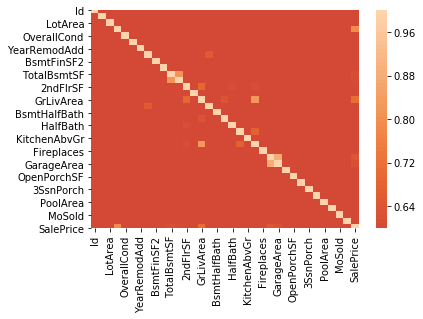

                     Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590  

In [9]:
# type(df.at[0,i]) is str

# 文字列を削除
def str_red(df_train):
    for i in df_train.columns:
        if type(df_train.at[0,i]) is str:
            df_train = df_train.drop(i, axis=1)
    return df_train
df_correlation = str_red(df)

sns.heatmap(df.corr(method='pearson'),
            vmin=0.6,
            vmax=1.0,
            center=0,
#             annot=True, # True:格子の中に値を表示
#             fmt='.1f',
#             xticklabels=df.corr(method='pearson').columns.values,
#             yticklabels=df.corr(method='pearson').columns.values
           )
plt.show()
df_final0 = df.corr(method='pearson')
print(df_final0)

目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

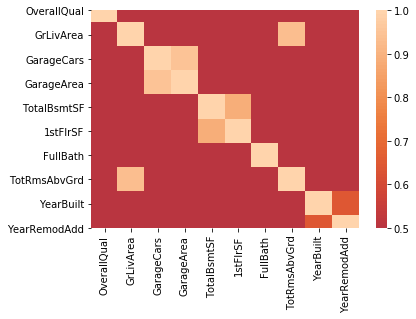

In [15]:
df_correlation = df.corr(method='pearson')
df_correlation.loc["SalePrice"]
df_correlation.sort_values('SalePrice', ascending=False)
df_correlation10 = df_correlation.loc\
[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd'],\
['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]

# print(df_correlation10)

# df_correlation10 = str_red(df)

sns.heatmap(df_correlation10.corr(method='pearson'),
            vmin=0.5,
            vmax=1.0,
            center=0,
#             annot=True, # True:格子の中に値を表示
#             fmt='.1f',
#             xticklabels=df.corr(method='pearson').columns.values,
#             yticklabels=df.corr(method='pearson').columns.values
           )
plt.show()

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

'OverallQual'
 全体的な素材と仕上げの品質について１０段階評価
'GrLivArea'
　居住エリアの広さfeet2
'GarageCars'
　ガレージに入る車の台数
'GarageArea'
　ガレージの広さfeet2
'TotalBsmtSF'
　敷地面積feet2
'1stFlrSF'
　１階の床面積feet2
'FullBath'
　バスルームのグレード
'TotRmsAbvGrd'
　バスルームを除く部屋のグレード
'YearBuilt'
　建築年
'YearRemodAdd'
　リホームした年

選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

In [18]:
print(df_correlation10.corr(method='pearson'))

              OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
OverallQual      1.000000  -0.024136    0.250876    0.178476     0.014148   
GrLivArea       -0.024136   1.000000   -0.243615   -0.200389    -0.070075   
GarageCars       0.250876  -0.243615    1.000000    0.948658    -0.086902   
GarageArea       0.178476  -0.200389    0.948658    1.000000     0.090001   
TotalBsmtSF      0.014148  -0.070075   -0.086902    0.090001     1.000000   
1stFlrSF        -0.152235   0.245254   -0.151426    0.038160     0.884946   
FullBath         0.080149   0.414879   -0.176745   -0.304927    -0.526150   
TotRmsAbvGrd    -0.180819   0.933231   -0.299984   -0.288851    -0.255605   
YearBuilt        0.326175  -0.828125    0.292444    0.174474    -0.170933   
YearRemodAdd     0.282906  -0.628283   -0.003113   -0.129341    -0.412951   

              1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
OverallQual  -0.152235  0.080149     -0.180819   0.326175      0.282906  
GrLi

In [ ]:
1)'GarageCars'*'GarageArea' = 0.948658
2)'TotalBsmtSF'*'1stFlrSF' = 0.884946
3)'GrLivArea'*'TotRmsAbvGrd' = 0.933231
